# 다중선형회귀
- 독립변수가 2개 이상인 경우의 회귀분석
- `분석 정확도를 높이기 위해` `적절하지 않은 변수를 추려내는 과정`을 반복적으로 수행하여 `최적의 독립변수 그룹을 찾아내는 것`이 목표
## 1. 작업 준비
### 패키지 참조

In [4]:
from pandas import read_excel, DataFrame
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sb
import sys, os
import statsmodels.api as sm

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import ext_ols, my_ols

### 데이터 가져오기

|필드|설명|
|--:|-|
|CRIM|범죄율|
|ZN|25,000 평방피트를 초과 거주지역 비율|
|INDUS|비소매상업지역 면적 비율|
|CHAS|찰스강의 경계에 위치한 경우는 1, 아니면 0|
|NOX|일산화질소 농도|
|RM|주택당 방 수|
|AGE|1940년 이전에 건축된 주택의 비율|
|DIS|직업센터의 거리|
|RAD|방사형 고속도로까지의 거리|
|TAX|재산세율|
|PTRATIO|학생/교사 비율|
|B|인구 중 흑인 비율|
|LSTAT|인구 중 하위 계층 비율|
|MEDV|집값|
|CAT.MEDV|$3000 이상 여부|

In [5]:
df = read_excel("https://data.hossam.kr/E04/boston.xlsx")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [6]:
df.shape

(506, 15)

## 2. 파이썬의 ols 객체로 분석 (맛보기)
- 임의의 독립변수를 선정하여 분석 수행
- `ols('종속변수 ~ 독립변수1 + 독립변수2', data=오리지널데이터프레임)`
- `모델객체.fit()`

In [7]:
model = ols('MEDV ~ CRIM + INDUS', data=df)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     96.83
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           2.66e-36
Time:                        12:12:10   Log-Likelihood:                -1757.8
No. Observations:                 506   AIC:                             3522.
Df Residuals:                     503   BIC:                             3534.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.2483      0.670     43.624      0.000      27.931      30.566
CRIM          -0.2455      0.044     -5.536      0.000      -0.333      -0.158
INDUS         -0.5234      0.056     -9.414      0.000      -0.633      -0.414
==============================================================================
Omnibus:                      193.751   Durbin-Watson:                   0.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.883
Skew:                           1.800   Prob(JB):                    1.03e-142
Kurtosis:                       7.248   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. 모듈화 한 기능을 활용
### 1) 모든 변수 사용하기
#### 모든 독립변수의 이름을 리스트로 생성

In [8]:
cls = list(df.columns)
cls.remove('MEDV')
cls.remove('CAT. MEDV')
cls

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

#### 분석 수행

In [9]:
model, fit, summary, table, result, goodness, varstr = ext_ols(df, x=cls, y="MEDV")


In [10]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 26 Jul 2023   Prob (F-statistic):          6.72e-135
Time:                        12:12:15   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 분석 결과표 확인

In [11]:
table

B   표준오차  β         t   유의확률         VIF
종속변수 독립변수                                                    
MEDV CRIM      -0.1080  0.033  0   -3.287*  0.001    2.160156
     ZN         0.0464  0.014  0    3.382*  0.001    3.043697
     INDUS      0.0206  0.061  0    0.334*  0.738   14.755787
     CHAS       2.6867  0.862  0    3.118*  0.002    1.180552
     NOX      -17.7666  3.820  0   -4.651*  0.000   74.549360
     RM         3.8099  0.418  0    9.116*  0.000  136.875365
     AGE        0.0007  0.013  0    0.052*  0.958   21.541039
     DIS       -1.4756  0.199  0   -7.398*  0.000   16.044949
     RAD        0.3060  0.066  0    4.613*  0.000   15.404871
     TAX       -0.0123  0.004  0   -3.280*  0.001   61.939733
     PTRATIO   -0.9527  0.131  0   -7.283*  0.000   91.819346
     B          0.0093  0.003  0    3.467*  0.001   21.669504
     LSTAT     -0.5248  0.051  0  -10.347*  0.000   12.824787

#### 산점도 행렬을 통한 상관관계 확인

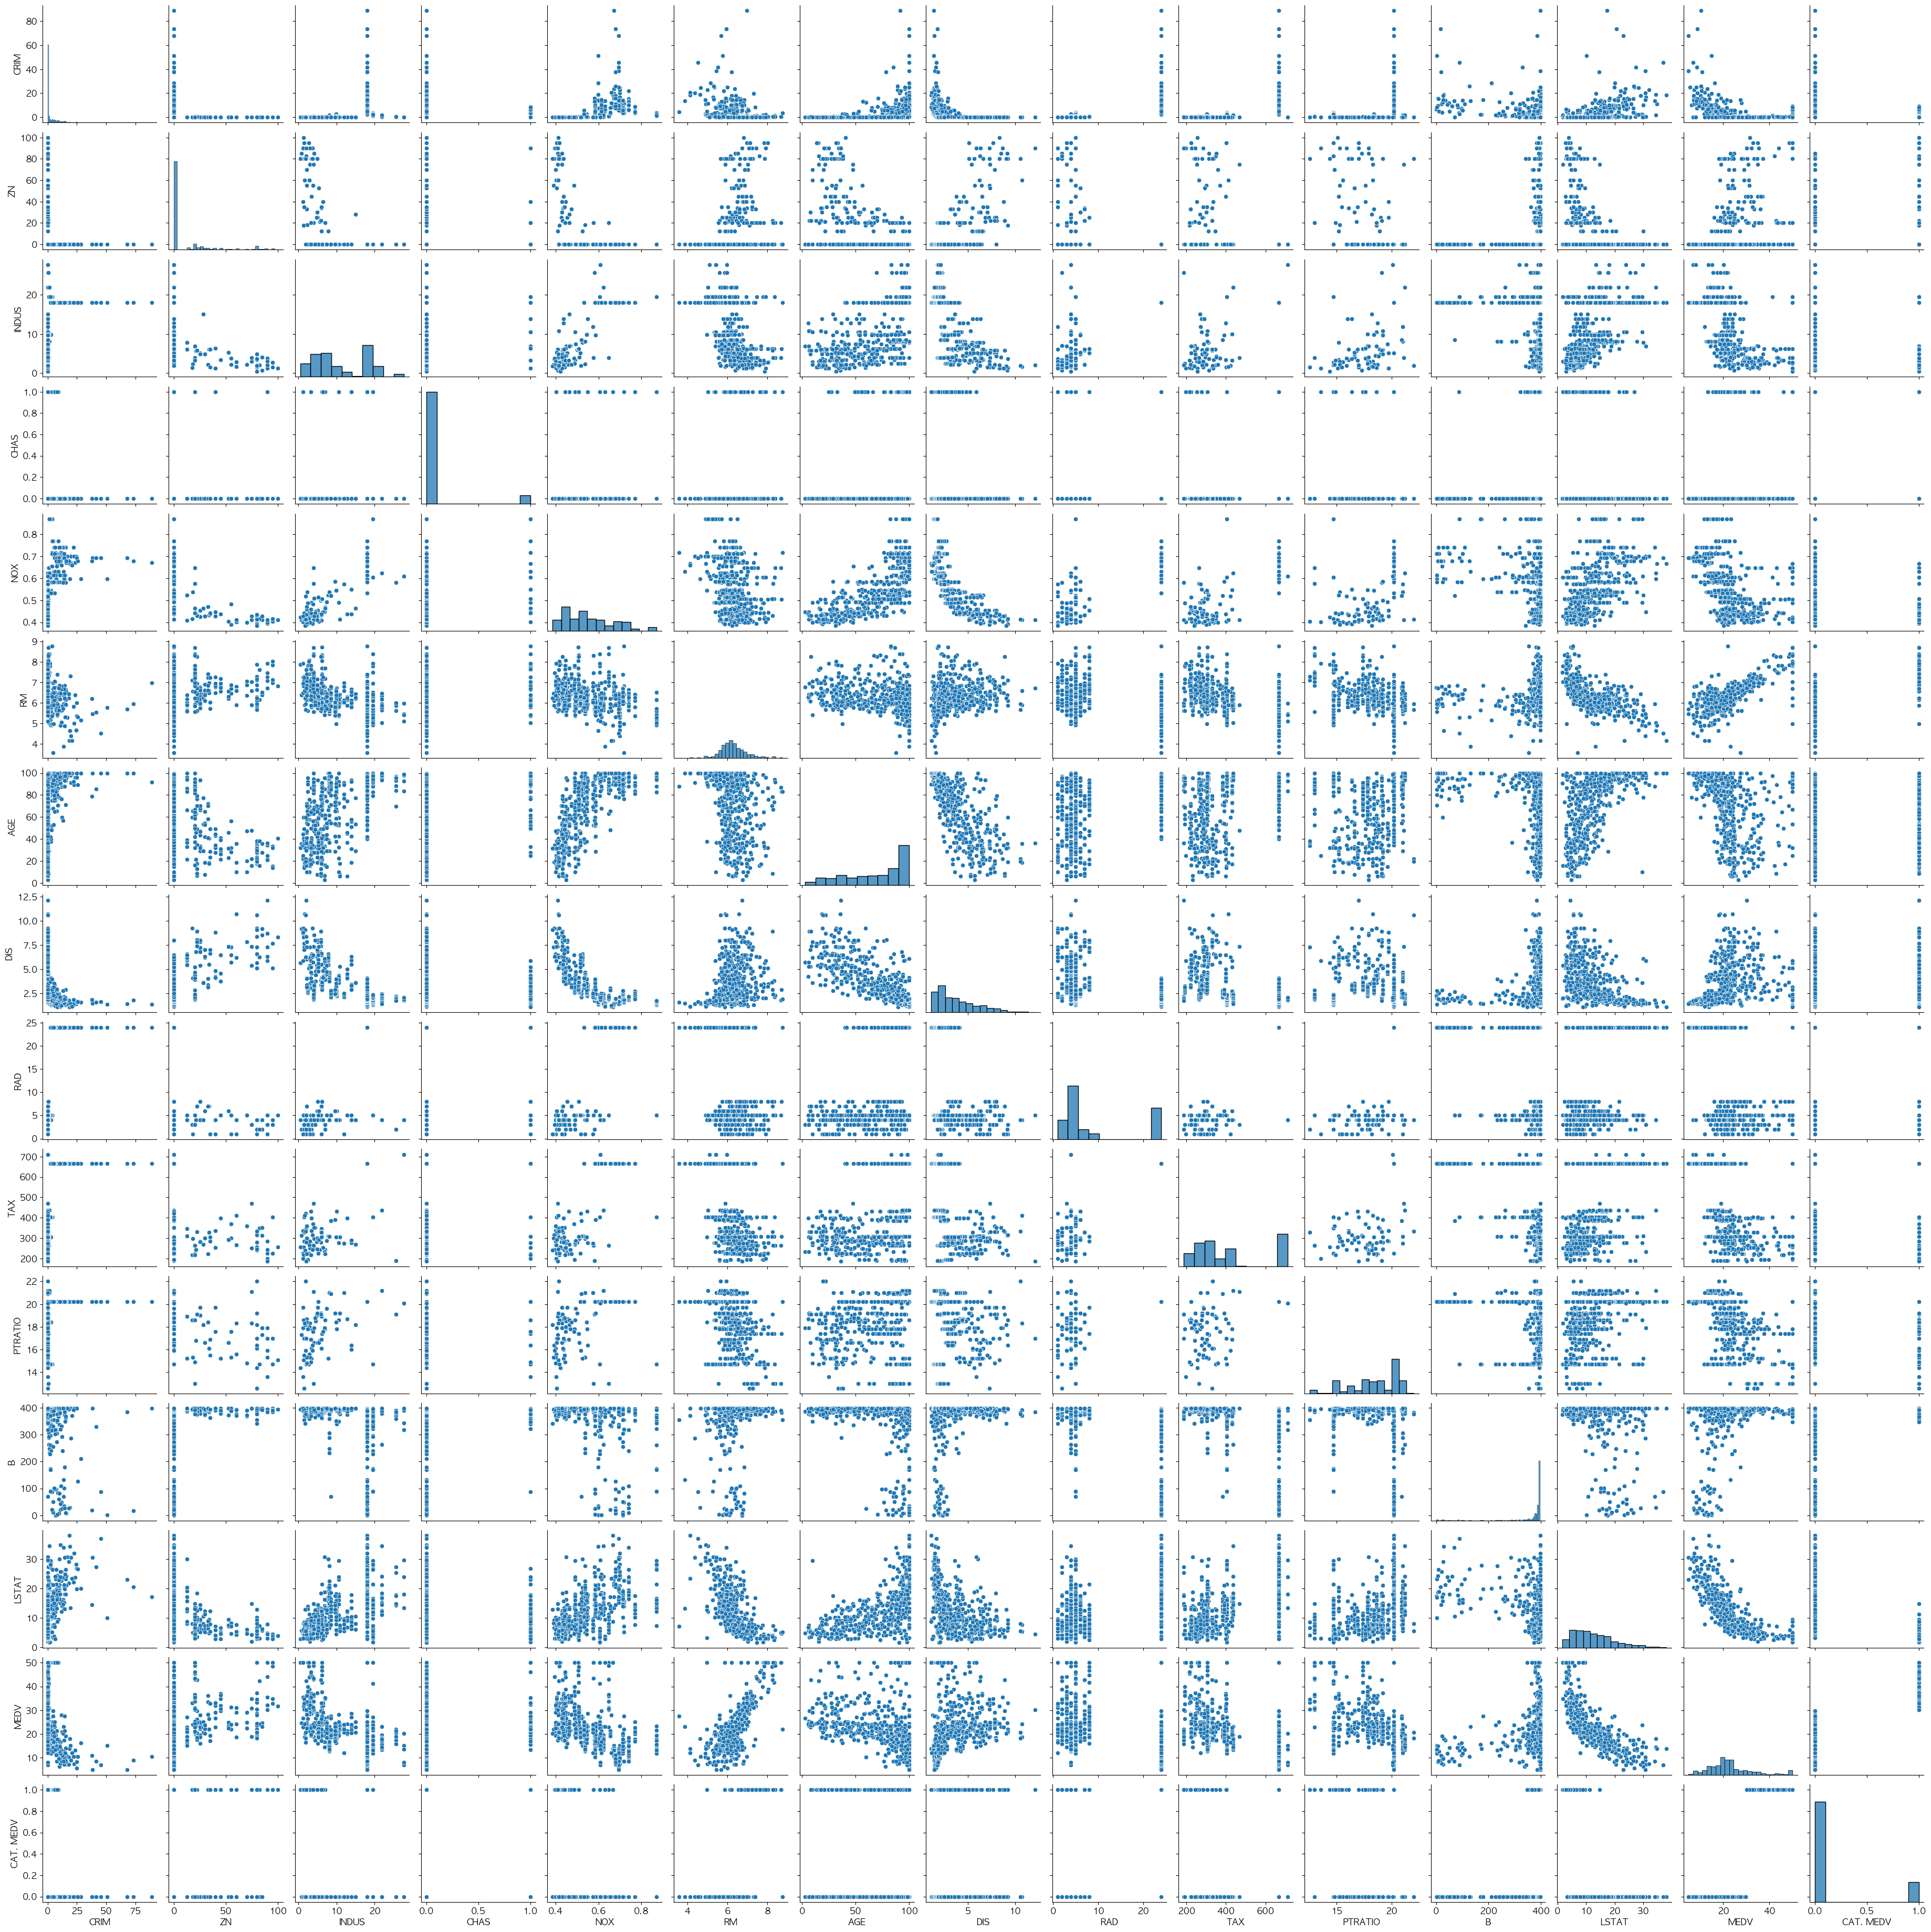

In [12]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (15, 15)
plt.rcParams["axes.unicode_minus"] = False

sb.pairplot(df)
plt.show()
plt.close()

#### VIF가 10 이상인 값을 제외하고 다시 분석

In [13]:
model2, fit2, summary2, table2, result2, goodness2, varstr2 = ext_ols(df, x="CRIM,ZN,CHAS".split(","), y="MEDV")
summary2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     59.67
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           5.23e-33
Time:                        12:12:50   Log-Likelihood:                -1763.1
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     502   BIC:                             3551.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.9715      0.449     48.937      0.000      21.089      22.854
CRIM          -0.3398      0.042     -8.108      0.000      -0.422      -0.257
ZN             0.1199      0.015      7.761      0.000       0.090       0.150
CHAS           6.1729      1.392      4.435      0.000       3.438       8.907
==============================================================================
Omnibus:                      150.219   Durbin-Watson:                   0.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              358.817
Skew:                           1.524   Prob(JB):                     1.21e-78
Kurtosis:                       5.779   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print(table2)
print(result2)
print(goodness2)
print(varstr2)

                 B   표준오차  β        t   유의확률       VIF
종속변수 독립변수                                             
MEDV CRIM  -0.3398  0.042  0  -8.108*  0.000  2.160156
     ZN     0.1199  0.015  0   7.761*  0.000  3.043697
     CHAS   6.1729  1.392  0   4.435*  0.000  1.180552
𝑅(0.263), 𝑅^2(0.258), 𝐹(59.67), 유의확률(5.23e-33), Durbin-Watson(0.821)
MEDV에 대하여 CRIM,ZN,CHAS로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(3,502) = 59.67, p < 0.05).
['CRIM의 회귀계수는 -0.3398(p<0.05)로, MEDV에 대하여 유의미한 예측변인인 것으로 나타났다.', 'ZN의 회귀계수는 0.1199(p<0.05)로, MEDV에 대하여 유의미한 예측변인인 것으로 나타났다.', 'CHAS의 회귀계수는 6.1729(p<0.05)로, MEDV에 대하여 유의미한 예측변인인 것으로 나타났다.']


In [15]:
names3 = ["CRIM", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
result = my_ols(df, x=names3, y="MEDV")

In [1]:
result.summary
# CPU 차이 때문에 Mac이랑 Windows랑 중간 coef 값 등이 미미하게 다름
# 그러나 나중에 최종 결과값은 똑같을 것임

NameError: name 'result' is not defined

In [17]:
result.table

B      표준오차  β          t   유의확률         VIF
종속변수 독립변수                                                          
MEDV CRIM     -2.354e-16  4.59e-16  0    -0.512*  0.609    2.160156
     INDUS    -3.107e-16  8.53e-16  0    -0.364*  0.716   14.755787
     CHAS      5.646e-16  1.26e-14  0     0.045*  0.964    1.180552
     NOX       2.056e-14  5.56e-14  0     0.370*  0.712   74.549360
     RM       -1.467e-15  6.51e-15  0    -0.225*  0.822  136.875365
     AGE      -2.521e-15  1.89e-16  0   -13.306*  0.000   21.541039
     DIS       1.055e-15  2.75e-15  0     0.383*  0.702   16.044949
     TAX       2.622e-16  3.27e-17  0     8.023*  0.000   61.939733
     PTRATIO   3.109e-16  1.85e-15  0     0.168*  0.867   91.819346
     B         8.504e-17  3.91e-17  0     2.172*  0.030   21.669504
     LSTAT    -5.793e-16  8.01e-16  0    -0.724*  0.470   12.824787
     MEDV         1.0000  6.34e-16  0  1.58e+15*  0.000   37.854383

## 4. 결과 비교하기

In [18]:
실제집값 = df["MEDV"]
실제집값

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [19]:
result1 = fit.predict(df.filter(cls))
result1

0      30.003843
1      25.025562
2      30.567597
3      28.607036
4      27.943524
         ...    
501    23.533341
502    22.375719
503    27.627426
504    26.127967
505    22.344212
Length: 506, dtype: float64

In [20]:
result2 = fit2.predict(df.filter(['CRIM','ZN','CHAS']))
result2

0      24.127287
1      21.962235
2      21.962242
3      21.960515
4      21.948050
         ...    
501    21.950232
502    21.956131
503    21.950867
504    21.934273
505    21.955404
Length: 506, dtype: float64

In [21]:
result3 = result.fit.predict(df.filter(names3))
result3

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [22]:
result_df = DataFrame({
    "실제집값":실제집값,
    "예측집값1":result1,
    "예측집값2":result2,
    "예측집값3":result3
})
result_df

,실제집값,예측집값1,예측집값2,예측집값3
0,24.0,30.003843,24.127287,24.0
1,21.6,25.025562,21.962235,21.6
2,34.7,30.567597,21.962242,34.7
3,33.4,28.607036,21.960515,33.4
4,36.2,27.943524,21.948050,36.2
...,...,...,...,...
501,22.4,23.533341,21.950232,22.4
502,20.6,22.375719,21.956131,20.6
503,23.9,27.627426,21.950867,23.9
504,22.0,26.127967,21.934273,22.0


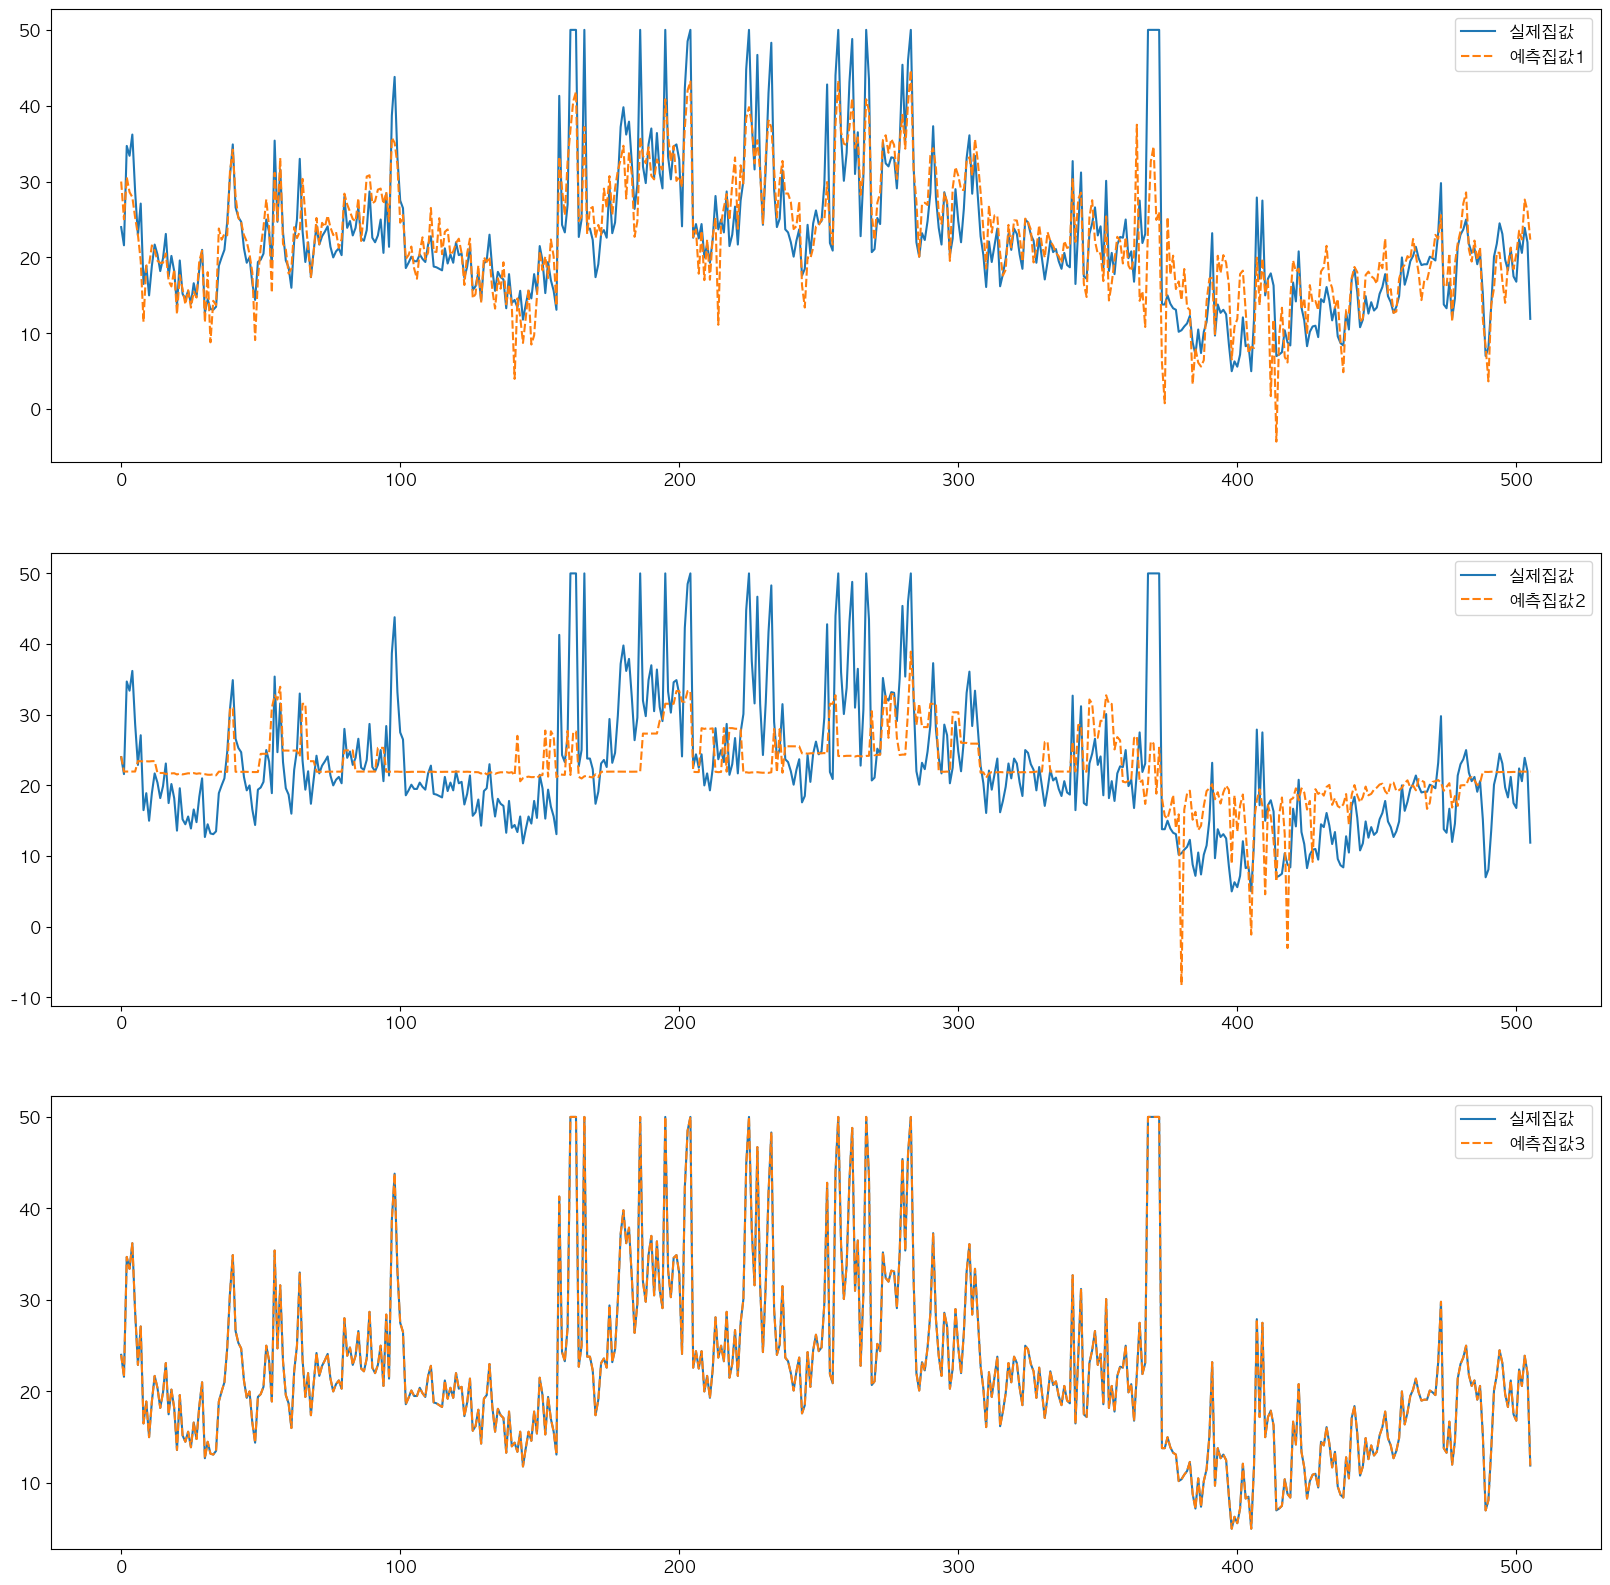

In [23]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.figsize"] = (20, 20)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

sb.lineplot(data=result_df.filter(['실제집값', '예측집값1']), ax=ax1)
sb.lineplot(data=result_df.filter(['실제집값', '예측집값2']), ax=ax2)
sb.lineplot(data=result_df.filter(['실제집값', '예측집값3']), ax=ax3)
plt.show()
plt.close()